In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [174]:
# The directory where csv files are located

directory = 'resources/'

# Create an empty list to store individual dataframe

dfs = []

# Iterating over all files in the directory

for filename in os. listdir(directory):
    if filename.endswith('.csv') and 'Summary' not in filename: # excluding the 'FIFA World Cup Summary' file
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)
        
# combine all DataFrames into one

combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to single CSV file

combined_df.to_csv('FIFA_World_cup_combined.csv', index=False)



In [175]:
# checking basic info
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         410 non-null    int64 
 1   Team             410 non-null    object
 2   Games Played     410 non-null    int64 
 3   Win              410 non-null    int64 
 4   Draw             410 non-null    int64 
 5   Loss             410 non-null    int64 
 6   Goals For        410 non-null    int64 
 7   Goals Against    410 non-null    int64 
 8   Goal Difference  410 non-null    object
 9   Points           410 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 32.2+ KB
None


In [176]:
combined_df.head()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Uruguay,4,3,1,0,15,5,10,7
1,2,Brazil,6,4,1,1,22,6,16,9
2,3,Sweden,5,2,1,2,11,15,−4,5
3,4,Spain,6,3,1,2,10,12,−2,7
4,5,Yugoslavia,3,2,0,1,7,3,4,4


In [177]:
# reading fifa summary world cup dataset
summary_df = pd.read_csv('resources/FIFA - World Cup Summary.csv')
summary_df.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [178]:
print(summary_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                22 non-null     int64  
 1   HOST                22 non-null     object 
 2   CHAMPION            22 non-null     object 
 3   RUNNER UP           22 non-null     object 
 4   THIRD PLACE         22 non-null     object 
 5   TEAMS               22 non-null     int64  
 6   MATCHES PLAYED      22 non-null     int64  
 7   GOALS SCORED        22 non-null     int64  
 8   AVG GOALS PER GAME  22 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.7+ KB
None


# Combining both summary and combined fifa summary world cup dataset

In [179]:
# Rename 'YEAR' to 'Year' in the summary DataFrame to match with 'combined_df'
summary_df.rename(columns={'YEAR': 'Year'}, inplace=True)

# Add a 'Year' column to 'combined_df' - You might need to add this if it's missing
# Extract the year from the filename or add manually if known
combined_df['Year'] = combined_df['Position'].apply(lambda x: 1930 + (x // 32) * 4)

# Merge both DataFrames on the 'Year' column
final_df = pd.merge(combined_df, summary_df, on='Year', how='left')

# Save the merged DataFrame to a new CSV file
final_df.to_csv('FIFA_World_Cup_Combined_Final.csv', index=False)

print("Both files have been successfully combined and saved as 'FIFA_World_Cup_Combined_Final.csv'.")


Both files have been successfully combined and saved as 'FIFA_World_Cup_Combined_Final.csv'.


In [180]:
# Load the merged DataFrame
final_df = pd.read_csv('FIFA_World_Cup_Combined_Final.csv')

# Convert all column headers to uppercase
final_df.columns = final_df.columns.str.upper()

# Save the updated DataFrame to a new file
final_df.to_csv('FIFA_World_Cup_Combined_Final_Uppercase.csv', index=False)

print("All column headers have been converted to uppercase and saved as 'FIFA_World_Cup_Combined_Final_Uppercase.csv'.")


All column headers have been converted to uppercase and saved as 'FIFA_World_Cup_Combined_Final_Uppercase.csv'.


In [181]:
final_df.head()

,POSITION,TEAM,GAMES PLAYED,WIN,DRAW,LOSS,GOALS FOR,GOALS AGAINST,GOAL DIFFERENCE,POINTS,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1,Uruguay,4,3,1,0,15,5,10,7,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,2,Brazil,6,4,1,1,22,6,16,9,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
2,3,Sweden,5,2,1,2,11,15,−4,5,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
3,4,Spain,6,3,1,2,10,12,−2,7,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
4,5,Yugoslavia,3,2,0,1,7,3,4,4,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


In [182]:
#checking for any duplicates 
duplicates = final_df[final_df.duplicated()]

# Display duplicates if found

if not duplicates.empty:
    print(f'\nNumber of duplicates row found: {len(duplicates)}')
    display(duplicates)
    
else: 
    print('\nNo duplicate row found.')


Number of duplicates row found: 1


,POSITION,TEAM,GAMES PLAYED,WIN,DRAW,LOSS,GOALS FOR,GOALS AGAINST,GOAL DIFFERENCE,POINTS,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
373,28,Saudi Arabia,3,0,1,2,2,7,−5,1,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


In [183]:
saudi_arabia_data = final_df[final_df['TEAM'] == 'Saudi Arabia']
saudi_arabia_data

,POSITION,TEAM,GAMES PLAYED,WIN,DRAW,LOSS,GOALS FOR,GOALS AGAINST,GOAL DIFFERENCE,POINTS,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
88,12,Saudi Arabia,4,2,0,2,5,6,−1,6,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
165,25,Saudi Arabia,3,1,0,2,3,5,-2,3,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
208,23,Saudi Arabia,3,1,0,2,2,7,−5,3,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
249,32,Saudi Arabia,3,0,0,3,0,12,−12,0,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
310,28,Saudi Arabia,3,0,1,2,2,7,−5,1,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
373,28,Saudi Arabia,3,0,1,2,2,7,−5,1,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


In [184]:
# Remove duplicates and keep the first occurrence
cleaned_df = final_df.drop_duplicates()

In [185]:
# checking clean data 

saudi_arabia_data = cleaned_df[cleaned_df['TEAM'] == 'Saudi Arabia']
saudi_arabia_data

,POSITION,TEAM,GAMES PLAYED,WIN,DRAW,LOSS,GOALS FOR,GOALS AGAINST,GOAL DIFFERENCE,POINTS,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
88,12,Saudi Arabia,4,2,0,2,5,6,−1,6,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
165,25,Saudi Arabia,3,1,0,2,3,5,-2,3,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
208,23,Saudi Arabia,3,1,0,2,2,7,−5,3,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
249,32,Saudi Arabia,3,0,0,3,0,12,−12,0,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
310,28,Saudi Arabia,3,0,1,2,2,7,−5,1,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


# Uploading data to SQLite database 

In [186]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [187]:
engine= create_engine("sqlite:///resources/fifa_world_cup_combined.sqlite")

In [188]:
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [189]:
cleaned_df.to_sql('fifa_world_cup_combined', engine, if_exists='replace', index=False)

409

In [190]:
Base.classes.keys()

[]

In [191]:
combined_dataset= pd.read_sql_table('fifa_world_cup_combined', con=engine)

combined_dataset.head()

,POSITION,TEAM,GAMES PLAYED,WIN,DRAW,LOSS,GOALS FOR,GOALS AGAINST,GOAL DIFFERENCE,POINTS,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1,Uruguay,4,3,1,0,15,5,10,7,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,2,Brazil,6,4,1,1,22,6,16,9,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
2,3,Sweden,5,2,1,2,11,15,−4,5,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
3,4,Spain,6,3,1,2,10,12,−2,7,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
4,5,Yugoslavia,3,2,0,1,7,3,4,4,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


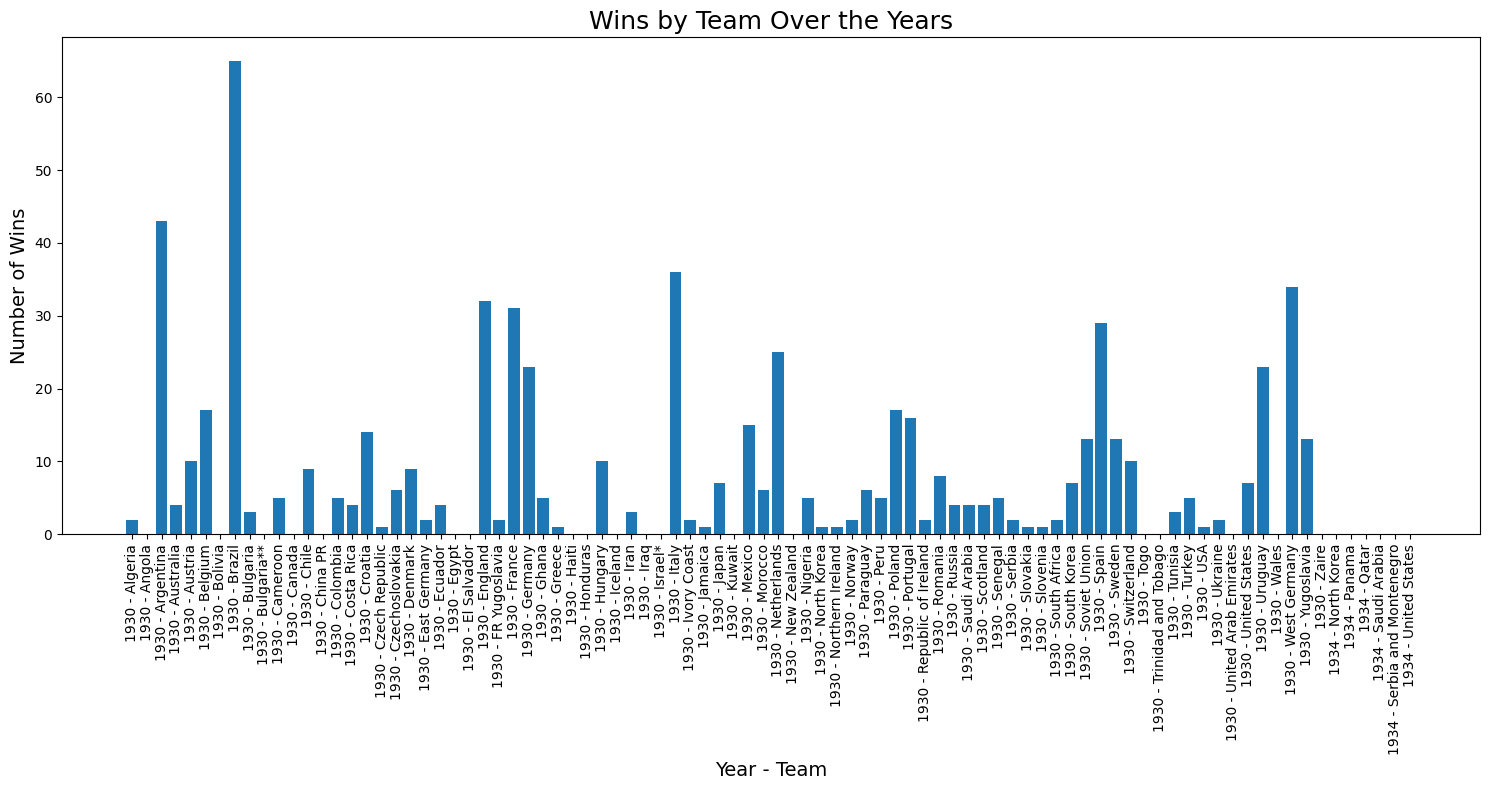

In [192]:
#plotting a bar plot
# Filter the dataframe to include only relevent columns
df_filtered = combined_dataset[['YEAR', 'TEAM', 'WIN']]

# Aggregate wins by year and team

df_grouped = df_filtered.groupby(['YEAR', 'TEAM'], as_index=False)['WIN'].sum()

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(df_grouped['YEAR'].astype(str) + " - " + df_grouped['TEAM'], df_grouped['WIN'])
plt.title('Wins by Team Over the Years', fontsize=18)
plt.xlabel('Year - Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [193]:
print(combined_dataset['TEAM'].dtypes)

object


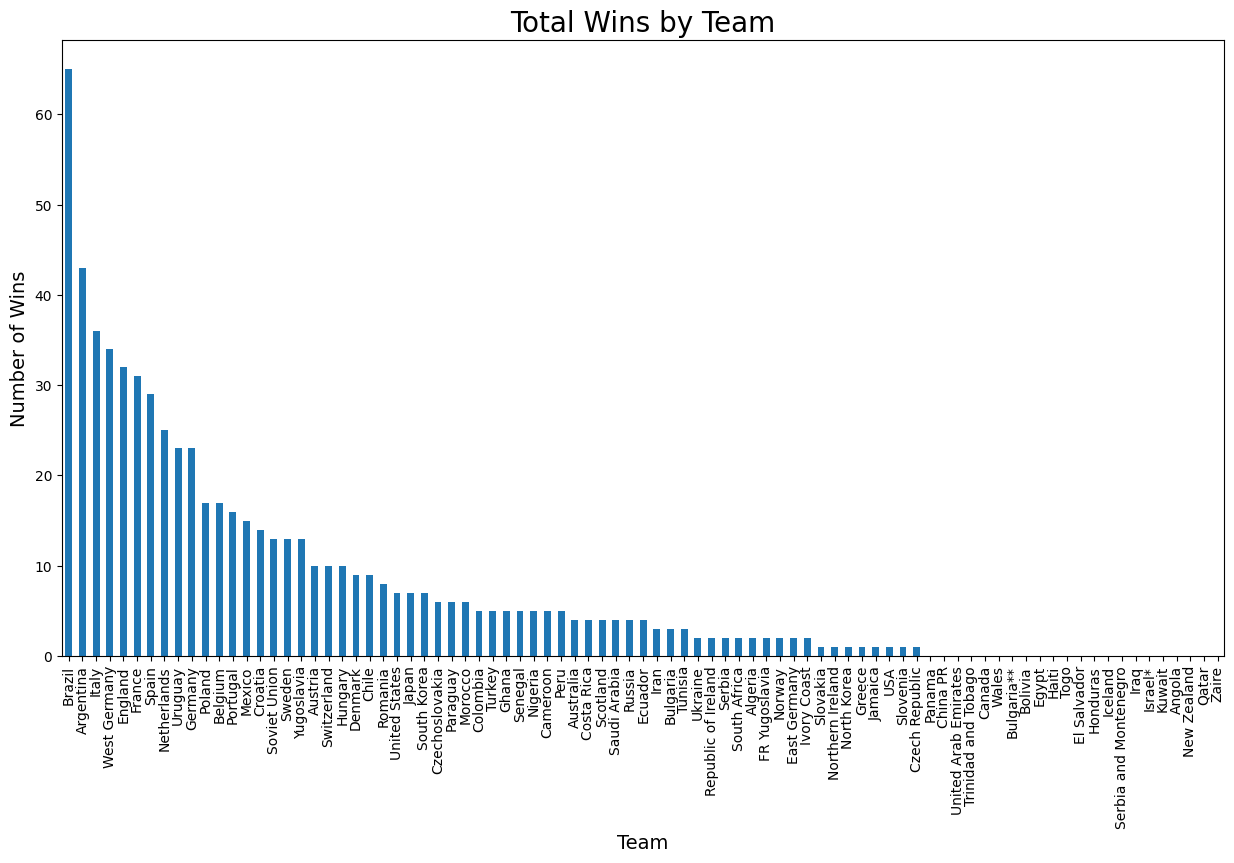

In [194]:
# Grouping the data by team and summing their total wins
team_wins = final_df.groupby('TEAM')['WIN'].sum().sort_values(ascending=False)

# Plotting a bar chart
plt.figure(figsize=(15, 8))
team_wins.plot(kind='bar')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.title('Total Wins by Team', fontsize=20)
plt.xticks(rotation=90)
plt.show()